In [2]:
from keras.datasets import mnist
import numpy as np
#from sklearn.utils import shuffle
#from sklearn.preprocessing import MinMaxScalar 

In [3]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

Training data:


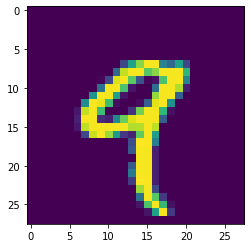

Label of this image is 9


In [4]:
import matplotlib.pyplot as plt
print("Training data:")
plt.imshow(xtrain[4])
plt.show()
print("Label of this image is",ytrain[4])

In [5]:
xtrain=np.reshape(xtrain,(-1,28,28,1))
xtest=np.reshape(xtest,(-1,28,28,1))
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

In [6]:
xtrain=xtrain/255
xtest=xtest/255

In [7]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(ytrain, num_classes=10)
y_test = to_categorical(ytest, num_classes=10)

In [8]:
from keras.models import Sequential

In [9]:
model=Sequential()

In [10]:
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [11]:
model.add(Conv2D(32,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(64,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))

model.add(Flatten())

model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="sigmoid"))

In [12]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [13]:
model.fit(xtrain,y_train,batch_size=100,epochs=5,validation_data=(xtest,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 112s 2ms/step - loss: 0.1518 - accuracy: 0.9530 - val_loss: 0.0372 - val_accuracy: 0.9871
Epoch 2/5
60000/60000 [==============================] - 123s 2ms/step - loss: 0.0442 - accuracy: 0.9863 - val_loss: 0.0336 - val_accuracy: 0.9891
Epoch 3/5
60000/60000 [==============================] - 121s 2ms/step - loss: 0.0299 - accuracy: 0.9905 - val_loss: 0.0265 - val_accuracy: 0.9913
Epoch 4/5
60000/60000 [==============================] - 126s 2ms/step - loss: 0.0213 - accuracy: 0.9933 - val_loss: 0.0273 - val_accuracy: 0.9911
Epoch 5/5
60000/60000 [==============================] - 136s 2ms/step - loss: 0.0174 - accuracy: 0.9945 - val_loss: 0.0301 - val_accuracy: 0.9914


In [15]:
model.evaluate(xtrain,y_train)
model.evaluate(xtest,y_test)

10000/10000 [==============================] - 6s 580us/step


[0.03009887092391582, 0.9914000034332275]